# Multilayer Perceptron

In [1]:
# Importamos los datos del dataset MNIST
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("tmp/data/", one_hot=True)

import tensorflow as tf

Extracting tmp/data/train-images-idx3-ubyte.gz
Extracting tmp/data/train-labels-idx1-ubyte.gz
Extracting tmp/data/t10k-images-idx3-ubyte.gz
Extracting tmp/data/t10k-labels-idx1-ubyte.gz


In [2]:
# parámetros de entrenamiento
learning_rate = 0.01
training_epochs = 10
batch_size = 100
display_step = 1

# parámetros de la red neuronal
n_hidden_1 = 256 # cantidad de features en la primera capa
n_hidden_2 = 256 # cantidad de features en la segunda capa
n_input = 784 # datos de entrada del dataset MNIST (img: 28*28)
n_classes = 10 # total de clases en el dataset (0-9 digits)

# entradas del grafo
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

In [3]:
# creamos el modelo
def multilayer_perceptron(x, weights, biases):
    # capa oculta con activación RELU
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # capa oculta con activación RELU
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # capa de salida con activación lineal
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

In [4]:
# guardamos los weights y los biases de cada capa
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# construimos el modelo
pred = multilayer_perceptron(x, weights, biases)

# definimos la función loss y el optimizador
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred, y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# inicializamos las variables
init = tf.initialize_all_variables()

Epoch: 0001 cost= 47.295618141
Epoch: 0002 cost= 8.126171197
Epoch: 0003 cost= 4.241171005
Epoch: 0004 cost= 2.767818457
Epoch: 0005 cost= 2.235687069
Epoch: 0006 cost= 1.849345485
Epoch: 0007 cost= 1.840215974
Epoch: 0008 cost= 1.551868073
Epoch: 0009 cost= 1.271646535
Epoch: 0010 cost= 1.246940929
Optimization Finished!
Accuracy: 0.9586


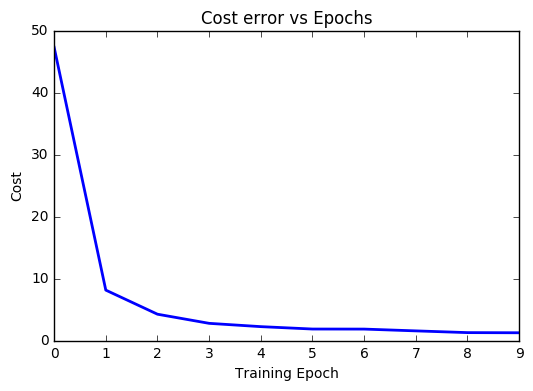

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# lanzamos el grafo
with tf.Session() as sess:
    sess.run(init)
    
    cost_list = []
    # ciclo de entrenamiento
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # hacemos loop sobre todos los batches
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # corremos optimización op (backprop) y coste op (para obtener el valor del loss)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_x,
                                                          y: batch_y})
            # calculamos el loss promedio
            avg_cost += c / total_batch
            
        # mostramos el log en cada epoch
        if epoch % display_step == 0:
            print "Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}".format(avg_cost)
            cost_list.append(avg_cost)
    print "Optimization Finished!"

    # probamos el modelo
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # calculamos el accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print "Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels})
    
    #plotting the loss function optimization
   
    plt.plot(range(training_epochs),cost_list,lw=2)
    plt.title("Cost error vs Epochs")
    plt.ylabel("Cost")
    plt.xlabel("Training Epoch")